# Gradient Descent

In [1]:
import matplotlib.pyplot as plt

## Newton's Method

Recall *Newton's Method* from High school:

$$
x \leftarrow x - \frac{f'(x)}{f(x)}
$$
                       
This exploitation of calculus can be used to estimate square roots by considering the gradient at given points.

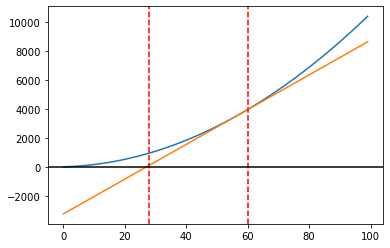

In [2]:
x = range(100)
y = [(x+3)**2 for x in x]
ylin = [120*x - 3240 for x in x]
plt.plot(x, y)
plt.plot(x, ylin)
plt.axvline(x=60, color='red', linestyle='--')
plt.axvline(x=28, color='red', linestyle='--') # This was a guess
plt.axhline(y=0, color='black', linestyle='-')


## Gradient Descent

### Linear Regression Theory

We take a similar approach with Gradient Descent, consider linear regression:

$$
y = mx+b + \rm{err}
$$

The following loss function is typically used (as it maximizes the likelihood)[^1]:
    
$$
\varepsilon = \sum^N_{i = 1} \left[ \left( y_i - \hat{y}_i \right) \right]
$$


[^1]: This loss function is used as it corresponds to a Maximum Likelihood Estimate under the assumption that $\mathrm{err} \sim \mathcal{N}\left(0, \sigma \right)$, although in *Mathematical Modelling* other loss functions are explored as well.

This can be expanded thusly:

$$
\varepsilon = \sum^N_{i = 1} \left[ \left( y_i - m x_i + b \right)^2 \right]
$$

and when plotted will look something like this:

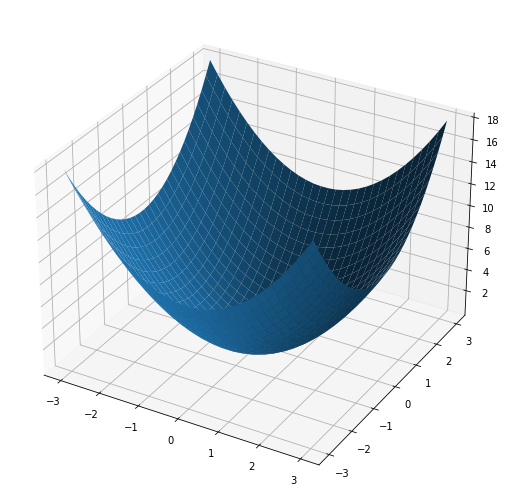

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (x**2 + y**2)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

all we want to do is find the minimum, so from calculus:

$$
\begin{aligned}
\frac{\partial\varepsilon}{\partial m}	&=\sum_{i=1}^{N}\left[-2x_{i}\left(y_{i}-mx_{i}+b\right)\right] \\
\frac{\partial\varepsilon}{\partial b}	&=\sum_{i=1}^{N}\left[2\left(y_{i}-mx_{i}+b\right)\right]
\end{aligned}
$$

for a parabaloid the minimum value can be found, this is not true of all functions (this was mentioned in *Mathematical Modelling*), so instead we use a numerical approach to find the minimum.

The simplest numerical approach is *Gradient Descent*, there are others that converge faster (and don't get stuck in local minimums), but this approach conveys the general idea:

$$
\begin{aligned}
m	\leftarrow m-\eta\left(\frac{\partial\varepsilon}{\partial m}\right) \\
b	\leftarrow b-\eta\left(\frac{\partial\varepsilon}{\partial b}\right)
\end{aligned}
$$

Play around with this idea and you'll see it checks out.

Often though, the intercept (or bias), is not expressed, it can be expressed away with a trick of linear algebra:

\begin{align*}
\begin{bmatrix}y_{1}\\
y_{2}\\
y_{3}\\
\vdots
\end{bmatrix} & =m\begin{bmatrix}x_{1}\\
x_{2}\\
x_{3}\\
\vdots
\end{bmatrix}+b\\
\begin{bmatrix}y_{1}\\
y_{2}\\
y_{3}\\
\vdots
\end{bmatrix} & =\begin{bmatrix}x_{1} & 1\\
x_{2} & 1\\
x_{3} & 1\\
\vdots & \vdots
\end{bmatrix}\begin{bmatrix}m\\
b
\end{bmatrix}\\
\hat{y} & ={\bf X}{\bf W}
\end{align*}


But be careful, that representation works for column-major languages like **R**, *Julia* and Fortran, but for row-major languages like ***C***, *Python*, *Go* or really everything else, things have to get moved around for performance concerns:

\begin{align*}
\begin{bmatrix}y_{1} & y_{2} & y_{3} & \cdots\end{bmatrix} & =\begin{bmatrix}m & b\end{bmatrix}\begin{bmatrix}x_{1} & x_{2} & x_{3} & \cdots\\
1 & 1 & 1 & \cdots
\end{bmatrix}\\
\hat{y} & ={\bf W}{\bf X}
\end{align*}


This can get so confusing it's not even funny :(

### Linear Regression Example

Consider the following dataset:

In [4]:
x = np.array([26, 25, 21, -4])
y = np.array([79, 78, 71, 24])

and following randomly set model

In [5]:
def model(m, b, xv: np.ndarray):
    return m*x+b

import random
m = random.random()
b = random.random()
yhat = model(m, b, x)

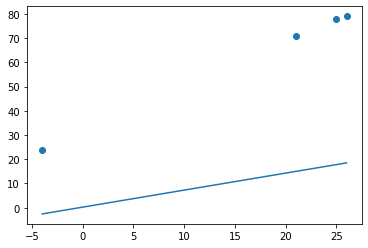

In [6]:
plt.scatter(x, y)
plt.plot(x, yhat)

#### Calculate Loss

This is quite a poor model, so we'll quantify it using rss:

In [7]:
def rss(yhat, y) -> np.float64:
    loss = np.sum((yhat-y)**2)
    return loss

In [8]:
rss(yhat, y)

11132.469746443547

Which means we can now calculate the gradient of m and b with respect to the loss:

In [9]:
def mgrad(x: np.ndarray, y: np.ndarray, m: float, b: float) -> float:
    grad = np.sum(-2*x*(y-m*x+b))
    return grad

def bgrad(x: np.ndarray, y: np.ndarray, m: float, b: float) -> float:
    grad = np.sum(2*(y-m*x+b))
    return grad

#### Calculate Gradients

In [10]:
mg = mgrad(x, y, m, b)
mg

-8362.643781103989

In [11]:
bg = bgrad(x, y, m, b)
bg

410.45118536185083

#### Backprop

To optimise the loss we can use gradient descent:

In [12]:
lr = 0.00001
def opt(mg: float, bg: float, m: float, b: float, lr: float):
    m -= lr * mg
    b -= lr * bg
    
    return m,b

In [13]:
m, b = opt(mg, bg, m, b, lr)

#### Repeat

Now if we repeat this, the loss will be lower:

In [14]:
yhat = model(m, b, x)
rss(yhat, y)

10452.45832570438

If it is higher, the learning rate $\eta$ may be to high.

Remember, also, that this is merely training error, it tells us nothing about how the model will generalise, in this case the model is linear so the model should not vary much between training data.

#### Loop

If we repeat all of this in a loop, we can train our model

In [15]:
losses = []
EPOCHS = 100
for i in range(100):
    # Fit the model
    yhat = model(m, b, x)
    
    # Measure the loss:
    losses.append(rss(yhat, y))
    
    # Calculate the gradients:
    mg = mgrad(x, y, m, b)
    bg = bgrad(x, y, m, b)
    
    # Backpropogate
    m, b = opt(mg, bg, m, b, lr)
    
    
    

In doing so we can see the training error decreasing each time:

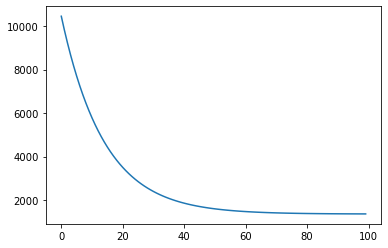

In [16]:
plt.plot(losses)

But the point is if we look at the model:

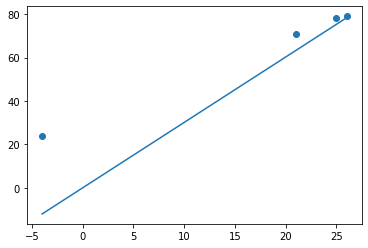

In [17]:
plt.scatter(x, y)
plt.plot(x, yhat)

It's actually learned to optimise the points.